In [3]:
import os
os.chdir("/gpfs/home/asun/jin_lab/get/GEARS/demo/")
print(os.getcwd())
import sys
sys.path.append(os.path.abspath('..'))

from gears import PertData, GEARS

/gpfs/group/jin/asun/get/GEARS/demo


/gpfs/home/asun/miniforge3/envs/gears/lib/python3.12/site-packages/anndata/utils.py:434: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/gpfs/home/asun/miniforge3/envs/gears/lib/python3.12/site-packages/anndata/utils.py:434: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/gpfs/home/asun/miniforge3/envs/gears/lib/python3.12/site-packages/anndata/utils.py:434: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/gpfs/home/asun/miniforge3/envs/gears/lib/python3.12/site-packages/anndata/utils.py:434: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/gpfs/home/asun/miniforge3/envs/gears/lib/python3.12/site-packages/anndata/utils.py:434: Futur

In [5]:
import gears
print(gears.__file__)

/gpfs/home/asun/miniforge3/envs/gears/lib/python3.12/site-packages/gears/__init__.py


Load data. We use norman as an example.

In [5]:
pert_data = PertData('./data') # specific saved folder
pert_data.load(data_path = './data/boli') # load the processed data, the path is saved folder + dataset_name
pert_data.prepare_split(split = 'simulation_single', seed = 1) # get data split with seed
pert_data.get_dataloader(batch_size = 32, test_batch_size = 128) # prepare data loader

Found local copy...
Found local copy...
These perturbations are not in the GO graph and their perturbation can thus not be predicted
['TRIO+ctrl' 'DAB1+ctrl' 'CX3CL1+ctrl']
Local copy of pyg dataset is detected. Loading...
Done!
Local copy of split is detected. Loading...
Done!
Creating dataloaders....
Done!


here1


Create a model object; if you use [wandb](https://wandb.ai), you can easily track model training and evaluation by setting `weight_bias_track` to true, and specify the `proj_name` and `exp_name` that you like.

In [3]:
gears_model = GEARS(pert_data, device = 'cuda:0', 
                        weight_bias_track = True, 
                        proj_name = 'gears', 
                        exp_name = 'boli')
gears_model.model_initialize(hidden_size = 64)

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin


Found local copy...


You can find available tunable parameters in model_initialize via

In [7]:
gears_model.tunable_parameters()

{'hidden_size': 'hidden dimension, default 64',
 'num_go_gnn_layers': 'number of GNN layers for GO graph, default 1',
 'num_gene_gnn_layers': 'number of GNN layers for co-expression gene graph, default 1',
 'decoder_hidden_size': 'hidden dimension for gene-specific decoder, default 16',
 'num_similar_genes_go_graph': 'number of maximum similar K genes in the GO graph, default 20',
 'num_similar_genes_co_express_graph': 'number of maximum similar K genes in the co expression graph, default 20',
 'coexpress_threshold': 'pearson correlation threshold when constructing coexpression graph, default 0.4',
 'uncertainty': 'whether or not to turn on uncertainty mode, default False',
 'uncertainty_reg': 'regularization term to balance uncertainty loss and prediction loss, default 1',
 'direction_lambda': 'regularization term to balance direction loss and prediction loss, default 1'}

Train your model:

Note: For the sake of demo, we set epoch size to 1. To get full model, set `epochs = 20`.

In [4]:
gears_model.train(epochs = 20, lr = 1e-3)

Start Training...
Epoch 1 Step 1 Train Loss: 0.5101
Epoch 1 Step 51 Train Loss: 0.4597
Epoch 1 Step 101 Train Loss: 0.5592
Epoch 1 Step 151 Train Loss: 0.5271
Epoch 1 Step 201 Train Loss: 0.6413
Epoch 1 Step 251 Train Loss: 0.4412
Epoch 1 Step 301 Train Loss: 0.5655
Epoch 1 Step 351 Train Loss: 0.5139
Epoch 1 Step 401 Train Loss: 0.5006
Epoch 1 Step 451 Train Loss: 0.5515
Epoch 1 Step 501 Train Loss: 0.6199
Epoch 1 Step 551 Train Loss: 0.4908
Epoch 1 Step 601 Train Loss: 0.5507
Epoch 1: Train Overall MSE: 0.0025 Validation Overall MSE: 0.0021. 
Train Top 20 DE MSE: 0.0174 Validation Top 20 DE MSE: 0.0178. 
Epoch 2 Step 1 Train Loss: 0.6395
Epoch 2 Step 51 Train Loss: 0.4665
Epoch 2 Step 101 Train Loss: 0.5214
Epoch 2 Step 151 Train Loss: 0.5280
Epoch 2 Step 201 Train Loss: 0.5297
Epoch 2 Step 251 Train Loss: 0.4918
Epoch 2 Step 301 Train Loss: 0.4611
Epoch 2 Step 351 Train Loss: 0.4084
Epoch 2 Step 401 Train Loss: 0.4683
Epoch 2 Step 451 Train Loss: 0.5021
Epoch 2 Step 501 Train Loss: 

Epoch 1 Step 1 Train Loss: 0.5626
Epoch 1 Step 51 Train Loss: 0.4361
Epoch 1 Step 101 Train Loss: 0.4368
Epoch 1 Step 151 Train Loss: 0.4140
Epoch 1 Step 201 Train Loss: 0.4180
Epoch 1 Step 251 Train Loss: 0.4792
Epoch 1 Step 301 Train Loss: 0.5223
Epoch 1 Step 351 Train Loss: 0.4383
Epoch 1 Step 401 Train Loss: 0.4672
Epoch 1 Step 451 Train Loss: 0.5511
Epoch 1 Step 501 Train Loss: 0.4343
Epoch 1 Step 551 Train Loss: 0.5042
Epoch 1 Step 601 Train Loss: 0.5136
Epoch 1 Step 651 Train Loss: 0.4401
Epoch 1 Step 701 Train Loss: 0.5244
Epoch 1 Step 751 Train Loss: 0.4747
Epoch 1 Step 801 Train Loss: 0.4465
Epoch 1 Step 851 Train Loss: 0.4545
Epoch 1 Step 901 Train Loss: 0.5126
Epoch 1 Step 951 Train Loss: 0.5011
Epoch 1 Step 1001 Train Loss: 0.4591
Epoch 1 Step 1051 Train Loss: 0.4627
Epoch 1 Step 1101 Train Loss: 0.6890
Epoch 1 Step 1151 Train Loss: 0.4552
Epoch 1 Step 1201 Train Loss: 0.4636
Epoch 1 Step 1251 Train Loss: 0.4276
Epoch 1 Step 1301 Train Loss: 0.4147
Epoch 1 Step 1351 Train 

Save and load pretrained models:

In [5]:
gears_model.save_model('boli_model')
gears_model.load_pretrained('boli_model')

Make prediction for new perturbation:

In [6]:
gears_model = GEARS(pert_data, device = 'cuda:0')
gears_model.load_pretrained('boli_model')

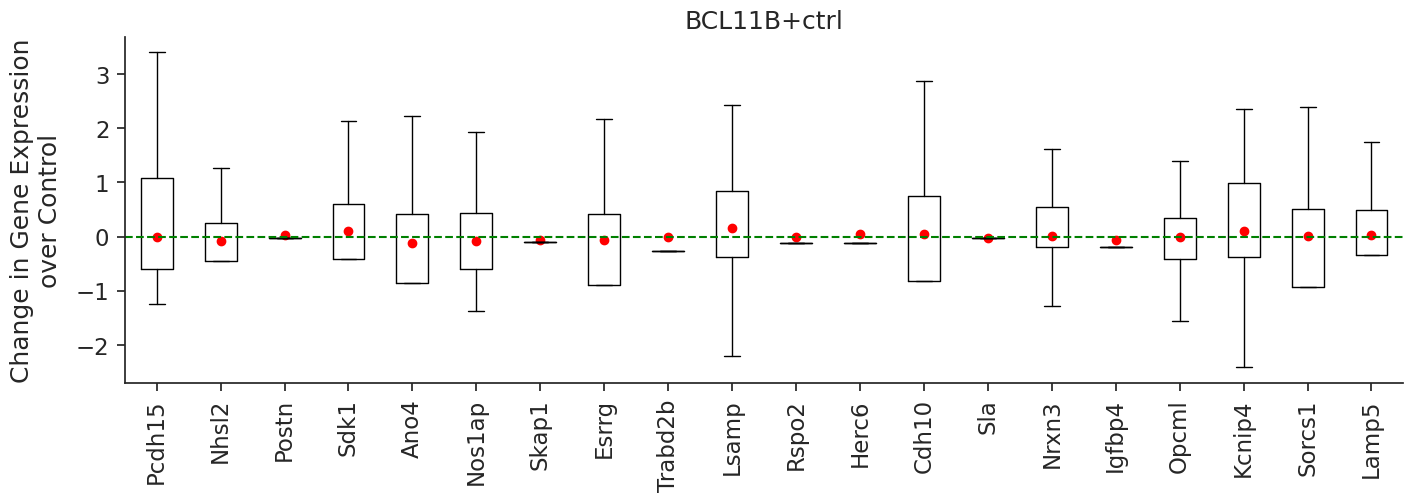

In [4]:
gears_model.plot_perturbation('BCL11B+ctrl')

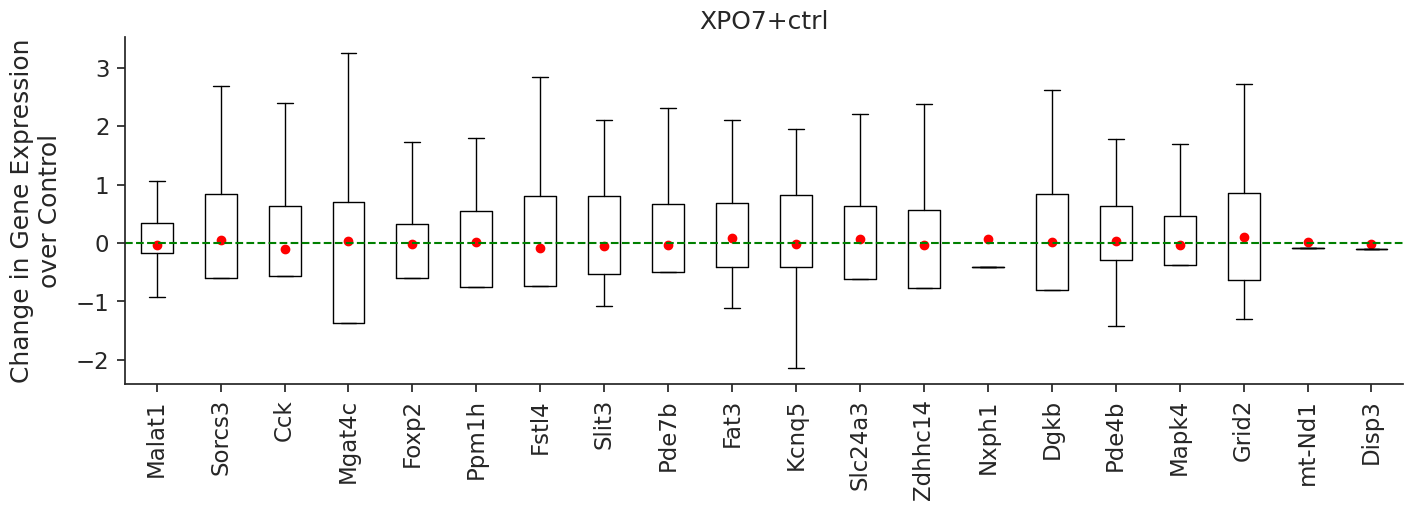

In [5]:
gears_model.plot_perturbation('XPO7+ctrl')

In [14]:
adata = gears_model.adata
cond2name = dict(adata.obs[['condition', 'condition_name']].values)

print(list(adata.uns['top_non_dropout_de_20'].keys()))
print(list(cond2name.keys()))

['Neuron_ANK3+ctrl_1+1', 'Neuron_BCL11B+ctrl_1+1', 'Neuron_CUL1+ctrl_1+1', 'Neuron_CX3CL1+ctrl_1+1', 'Neuron_DAB1+ctrl_1+1', 'Neuron_HERC1+ctrl_1+1', 'Neuron_RB1CC1+ctrl_1+1', 'Neuron_SATB2+ctrl_1+1', 'Neuron_TBR1+ctrl_1+1', 'Neuron_TRIO+ctrl_1+1', 'Neuron_XPO7+ctrl_1+1']
['BCL11B+ctrl', 'XPO7+ctrl', 'ANK3+ctrl', 'TBR1+ctrl', 'ctrl', 'SATB2+ctrl', 'CUL1+ctrl', 'RB1CC1+ctrl', 'HERC1+ctrl']


In [ ]:
print(gears_model.pert_data.perturbations)

In [10]:
result = gears_model.predict([['BCL11B']])

In [13]:
len(result['BCL11B'])

5000

Gene list can be found here:

In [8]:
len(gears_model.gene_list)

5000

# Predict for celleval?

In [20]:
import numpy as np
import pandas as pd
import anndata as ad

In [14]:
perturbations = ['BCL11B', 'XPO7', 'ANK3', 'TBR1', 'SATB2', 'CUL1', 'RB1CC1', 'HERC1']  # or any from your dataset
pred = gears_model.predict([[p] for p in perturbations])

In [17]:
X_pred = np.stack([pred[p] for p in perturbations])  # shape: (n_perturbations, n_genes)

In [21]:
obs_df = pd.DataFrame({
    'condition': perturbations,
    'cell_type': ['Neuron'] * len(perturbations),  # or whatever your cell type is
    'batch': ['GEARS'] * len(perturbations)        # optional but useful
}, index=perturbations)

In [23]:
var_df = gears_model.adata.var.copy()
if 'gene_name' not in var_df.columns:
    var_df['gene_name'] = var_df.index

In [22]:
adata_pred = ad.AnnData(
    X=X_pred,
    obs=obs_df,
    var=var_df
)

,condition,cell_type,batch
BCL11B,BCL11B,Neuron,GEARS
XPO7,XPO7,Neuron,GEARS
ANK3,ANK3,Neuron,GEARS
TBR1,TBR1,Neuron,GEARS
SATB2,SATB2,Neuron,GEARS
CUL1,CUL1,Neuron,GEARS
RB1CC1,RB1CC1,Neuron,GEARS
HERC1,HERC1,Neuron,GEARS


In [30]:
gears_model.adata.obs['condition'].value_counts()


condition
BCL11B+ctrl    5367
ctrl           5224
TBR1+ctrl      3466
RB1CC1+ctrl    2534
SATB2+ctrl     2320
HERC1+ctrl     2165
ANK3+ctrl      1763
XPO7+ctrl      1602
CUL1+ctrl      1297
Name: count, dtype: int64

In [35]:
import numpy as np
import pandas as pd
import anndata as ad

def simulate_deterministic_anndata(gears_model, pert_counts):
    all_X = []
    all_obs = []

    gene_names = gears_model.adata.var['gene_name'].values
    var_df = gears_model.adata.var.copy()

    for cond, n_cells in pert_counts.items():
        if cond == "ctrl":
            # Use control expression vector
            expr = gears_model.ctrl_expression.cpu().numpy()
        else:
            pert = cond.split('+')[0]  # Use only gene name
            pred = gears_model.predict([[pert]])[pert]
            expr = pred  # shape: (n_genes,)

        # Repeat predicted expression n_cells times
        mat = np.tile(expr, (n_cells, 1))
        all_X.append(mat)

        obs_df = pd.DataFrame({
            'condition': [cond] * n_cells,
            'perturbation': [cond.split('+')[0] if cond != "ctrl" else "ctrl"] * n_cells,
        })
        all_obs.append(obs_df)

    # Combine
    X = np.vstack(all_X)
    obs = pd.concat(all_obs, ignore_index=True)

    var_df = gears_model.adata.var.copy()
    if 'gene_name' not in var_df.columns:
        var_df['gene_name'] = var_df.index
    
    adata_sim = ad.AnnData(
        X=X,
        obs=obs,
        var=var_df
    )

    return adata_sim

In [36]:
adata_sim = simulate_deterministic_anndata(gears_model, gears_model.adata.obs['condition'].value_counts())

In [39]:
adata_sim..head(2)

,condition,perturbation
0,BCL11B+ctrl,BCL11B
1,BCL11B+ctrl,BCL11B


In [42]:
gears_model.adata.to_df().head(2)

,4,5,7,11,14,18,19,27,41,42,...,32197,32198,32199,32200,32201,32203,32204,32205,32207,32261
batch1_samp1_chan1_AAACCTGAGACAAAGG-1,0.000000,0.0,0.0,0.0,0.0,0.666819,0.0,0.666819,0.0,0.0,...,0.0,0.666819,0.0,0.0,0.666819,0.0,0.0,0.0,0.0,0.0
batch1_samp1_chan1_AAACCTGAGGCCGAAT-1,0.730666,0.0,0.0,0.0,0.0,0.000000,0.0,1.148331,0.0,0.0,...,0.0,0.730666,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [43]:
adata_sim.write("simulated_adata.h5ad")